In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Load the dataset and explore the variables.

In [5]:
imbalanced=pd.read_csv('customer_churn.csv')
imbalanced.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
imbalanced.Churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#Our goal is to predict who has Churn. We use logistic regression.

## Extract the target variable.

In [20]:
# X/y split
X = imbalanced[['tenure', 'SeniorCitizen','MonthlyCharges']]
y = imbalanced['Churn']

## Extract the independent variables and scale them.

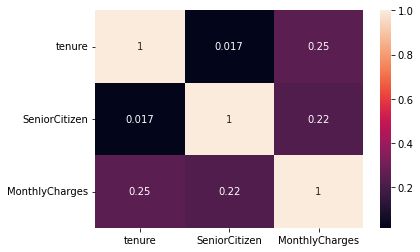

In [21]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [22]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # default fraction is .2

In [23]:
# we want to emphasize the outliers that's why we apply standard scaler.

In [24]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1.612532,-0.439763,0.674154
1,-0.747907,2.273954,-0.614894
2,1.571835,-0.439763,-1.335097
3,0.025340,-0.439763,0.301578
4,0.595101,-0.439763,1.128231


In [25]:
y_train.head()

2920     No
2966     No
6099     No
5482    Yes
2012    Yes
Name: Churn, dtype: object

In [26]:
# after transforming x_train, we reset index for y_train
# put our x_train and y_train back together to imbalance.

# if you have 4-5 classes, it is fine. More classes you have,
# less accurate it is.

In [27]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [28]:
y_train.head()

0     No
1     No
2     No
3    Yes
4    Yes
Name: Churn, dtype: object

## Build the logistic regression model.

In [51]:
# Linear relation on logit - what?

In [29]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [30]:
LR.predict_proba(X_train_scaled)

array([[0.96029038, 0.03970962],
       [0.60545231, 0.39454769],
       [0.99336071, 0.00663929],
       ...,
       [0.98781232, 0.01218768],
       [0.26199018, 0.73800982],
       [0.79398402, 0.20601598]])

In [31]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

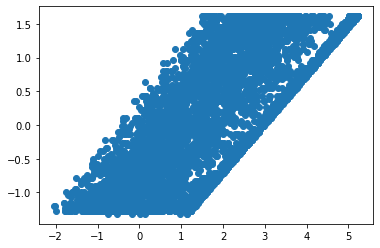

In [32]:
plt.scatter(logits,X_train_scaled['tenure'])

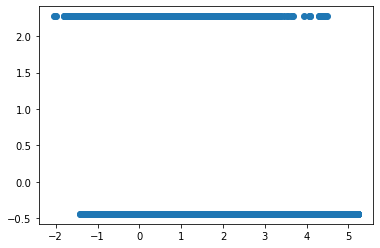

In [33]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

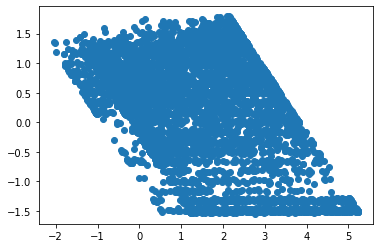

In [35]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

<AxesSubplot:>

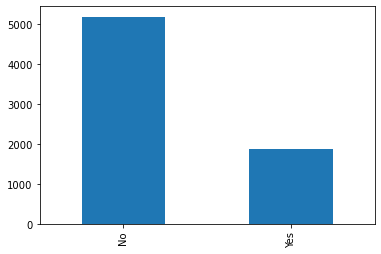

In [37]:
# while there are more imbalanced datasets, we have a significant imbalance
# and the cost of failing to detect the minority class is quite high
count_classes = imbalanced['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

# imbalanced data

In [49]:
imbalanced['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [50]:
5174/(5174+1896) # % of majority class. stupid model

0.7318246110325318

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7821149751596878

In [39]:
X_train_scaled.shape

(5634, 3)

In [40]:
y_train.shape

(5634,)

In [43]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #avg between precision and recall scores

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred,pos_label='Yes')) #precision is 61%. Out of the cases that we said the person would quit, 61 percent had.
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))  #?? 45% was the percent that was correctly caught by the model.
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))


precision:  0.6101083032490975
recall:  0.4592391304347826
f1:  0.524031007751938


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[933, 108],
       [199, 169]])

In [45]:
y_test.value_counts() 

No     1041
Yes     368
Name: Churn, dtype: int64

## Evaluate the model.

In [ ]:
# predicted   |  NO   | YES |
# --------------------------
# actual  NO  |  933  | 108 |
# --------------------------
#         Yes |  199  | 169 |   
# --------------------------

In [46]:
# Out of 277 customers that the model predicted to continue their subscription, 108 of them unsubscribed.
# Out of 277 customers that the model predicted to continue their subscription, 169 of them subscribed.
# Out of 1301 customers that the model predicted to unsubscribe, 933 of them unsubscribed.
# Out of 1301 customer that the model predicted to unsubscribe, 199 of them unsubscribed.

## Even a simple model will give us more than 70% accuracy. Why?

In [ ]:
# The imbalanced data (percentage difference between yes and no cases) is the cause of 
# 78% accuracy of our logistic regression model which is close to that of 'stupid' model (73%).

## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [55]:
!pip install imblearn
# !pip install scikit-learn==1.1.0
from imblearn.over_sampling import SMOTE

In [68]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100, k_neighbors=3) #number of neighbors used to create synthetic samples
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [69]:
X_train_SMOTE.shape

(8266, 3)

In [70]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred,pos_label='Yes')) #precision is 47%. Out of the cases that we said the customer will unsubscribe, 47 percent had.
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))  #?? 70% was the percent that was correctly caught by the model.
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))

precision:  0.4744525547445255
recall:  0.7065217391304348
f1:  0.5676855895196506


In [71]:
y_test.value_counts()

No     1041
Yes     368
Name: Churn, dtype: int64

In [72]:
confusion_matrix(y_test,pred)

array([[753, 288],
       [108, 260]])

In [73]:
# predicted   |  NO   | YES |
# --------------------------
# actual  NO  |  753  | 288 |
# --------------------------
#         Yes |  108  | 260 |   
# --------------------------

In [74]:
# Out of 1041 customers that the model predicted to continue their subscription, 288 of them unsubscribed.
# Out of 1041 customers that the model predicted to continue their subscription, 753 of them subscribed.
# Out of 368 customers that the model predicted to unsubscribe, 260 of them unsubscribed.
# Out of 368 customer that the model predicted to unsubscribe, 108 of them unsubscribed.

In [ ]:
# Is there any improvement?

# The recall percent increases from original logistic regression model (0.46%) to that with SMOTE (0.70%).
# On the other hand, according to the confusion matrix:
# For example, the original logistic regression model gives 1102 successful predictions in the confusion matrix.
# The model with SMOTE gives 1013 successful predictions in the confusion matrix.